<a href="https://colab.research.google.com/github/luuloi/GWAS_Introduction_2023/blob/main/02_Data_Visualization_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **1. Bar plot**

In [ ]:
# 1. Import data
data <- read.csv("https://raw.githubusercontent.com/luuloi/GWAS_Introduction_2023/main/data/StudentsPerformance.csv")

In [ ]:
## Check the number of columns and rows
dim(data)

[1] 1000    8

In [ ]:
## Show the first 6 rows of the dataset
head(data)

,gender,race.ethnicity,parental.level.of.education,lunch,test.preparation.course,math.score,reading.score,writing.score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group C,some college,standard,completed,69,90,88
3,female,group B,master's degree,standard,none,90,95,93
4,male,group A,associate's degree,free/reduced,none,47,57,44
5,male,group C,some college,standard,none,76,78,75
6,female,group B,associate's degree,standard,none,71,83,78


In [ ]:
# Classification thresholds
cutoff_weak <- 40
cutoff_good <- 70

# Create a vector to store the classification
classification <- rep("Weak", length(data$math.score))

# Update classification based on scores
classification[data$math.score >= cutoff_weak & data$math.score < cutoff_good] <- "Average"
classification[data$math.score >= cutoff_good] <- "Excellent"

# Add the classification column to the data
data$classification <- classification

In [ ]:
table(data$classification)


  Average Excellent      Weak 
      551       409        40 

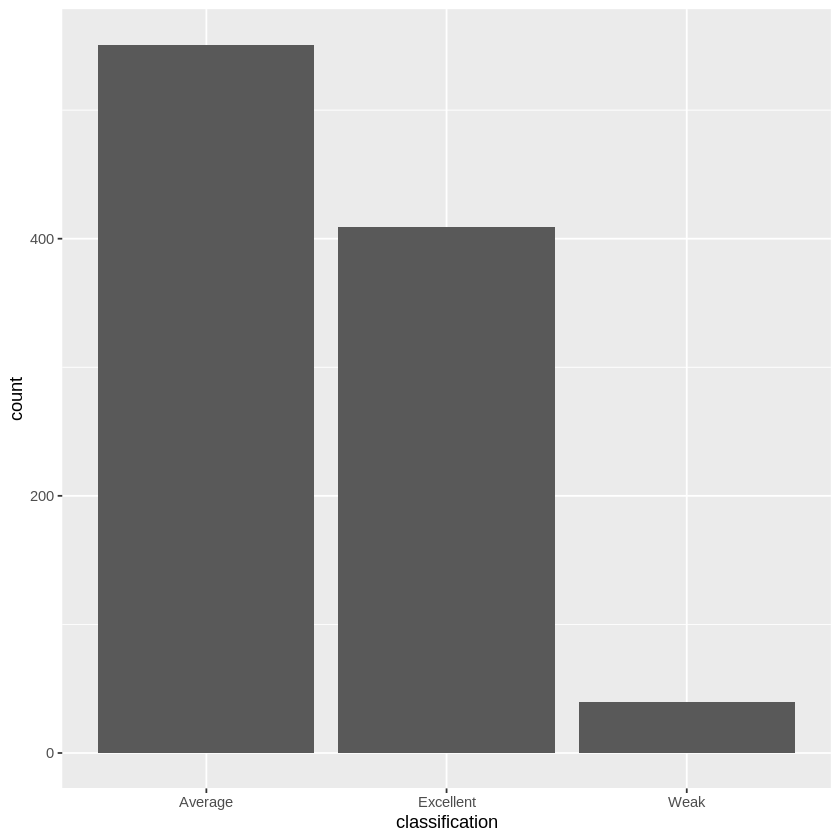

In [ ]:
# 3. Visualization
## Load required library
library(ggplot2)

## Basic ggplot2 barplot
ggplot(data, aes(x = classification)) +
    geom_bar()

# **2. Coloring the bar plot**

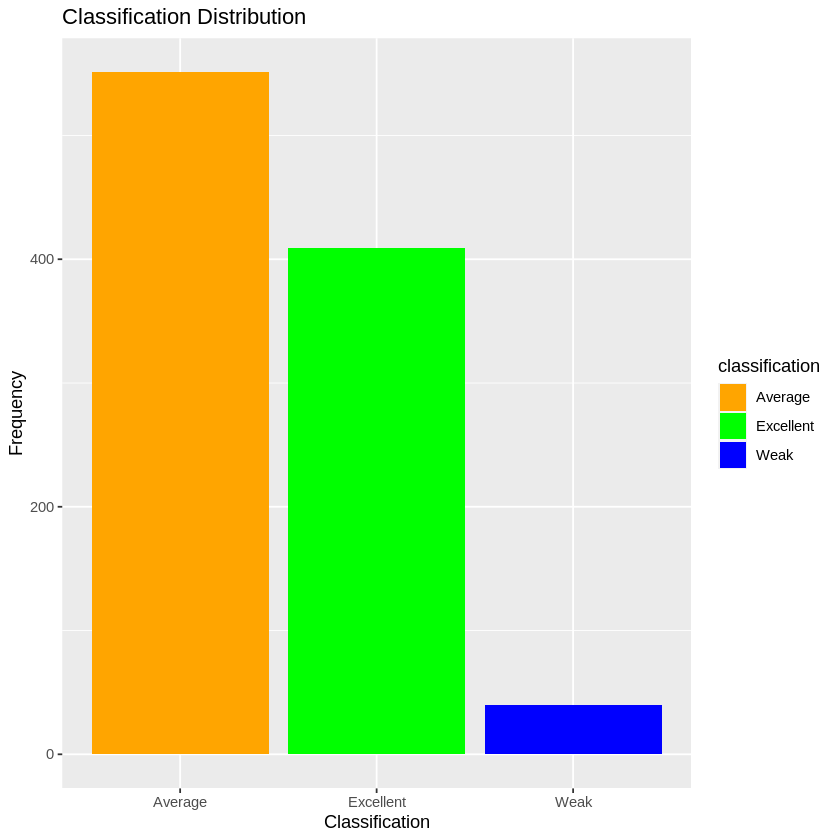

In [ ]:
barplot <- ggplot(data, aes(x = classification, fill = classification)) +
  geom_bar() +
  labs(title = "Classification Distribution", x = "Classification", y = "Frequency") +
  scale_fill_manual(values = c("Average" = "orange", "Excellent" = "green", "Weak" = "blue"))


print(barplot)

# **3. Bar plot with grouped data**

In [ ]:
# Create grouped data
data_new_2 <- data.frame(table(data$gender, data$classification))
colnames(data_new_2) <- c("gender", "learning_outcomes", "freq")
head(data_new_2)

,gender,learning_outcomes,freq
,<fct>,<fct>,<int>
1,female,Average,309
2,male,Average,242
3,female,Excellent,178
4,male,Excellent,231
5,female,Weak,31
6,male,Weak,9


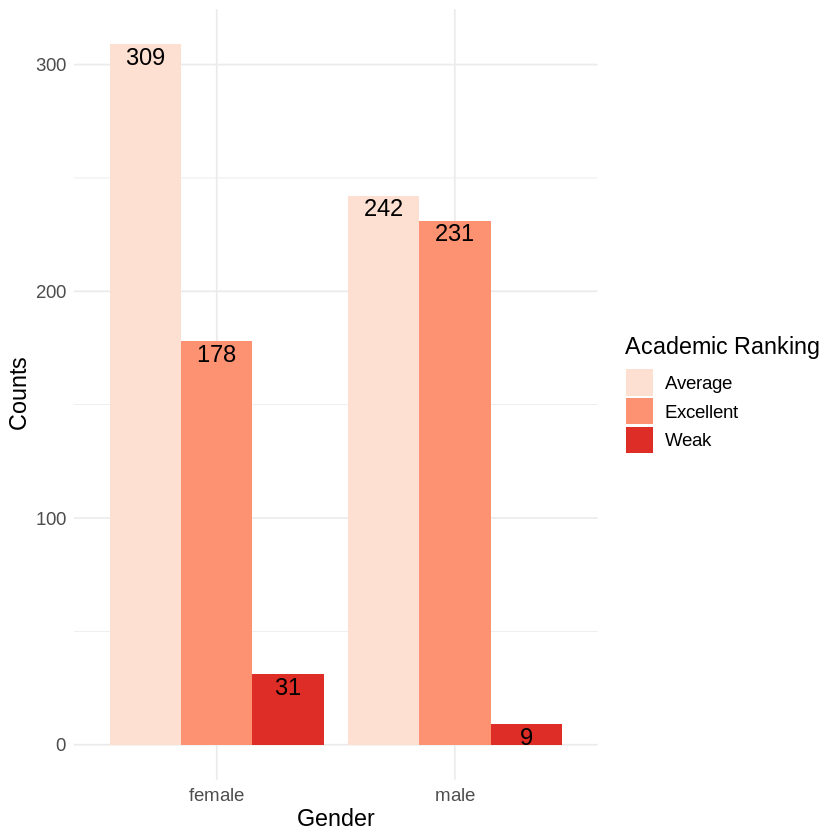

In [ ]:
# Create grouped barplots
ggplot(data_new_2, aes(x = gender, y = freq, fill = learning_outcomes)) +
    geom_bar(stat = "identity", position = position_dodge()) +
    geom_text(aes(label = freq),
        vjust = 1.2,
        color = "black",
        position = position_dodge(0.9),
        size = 5
    ) +
    theme_minimal() +
    theme(text = element_text(size = 14)) +
    labs(fill = "Academic Ranking", y = "Counts", x = "Gender") +
    scale_fill_brewer(palette = "Reds")

# **4. Table plot**

In [ ]:
table(data$gender,data$classification)

        
         Average Excellent Weak
  female     309       178   31
  male       242       231    9

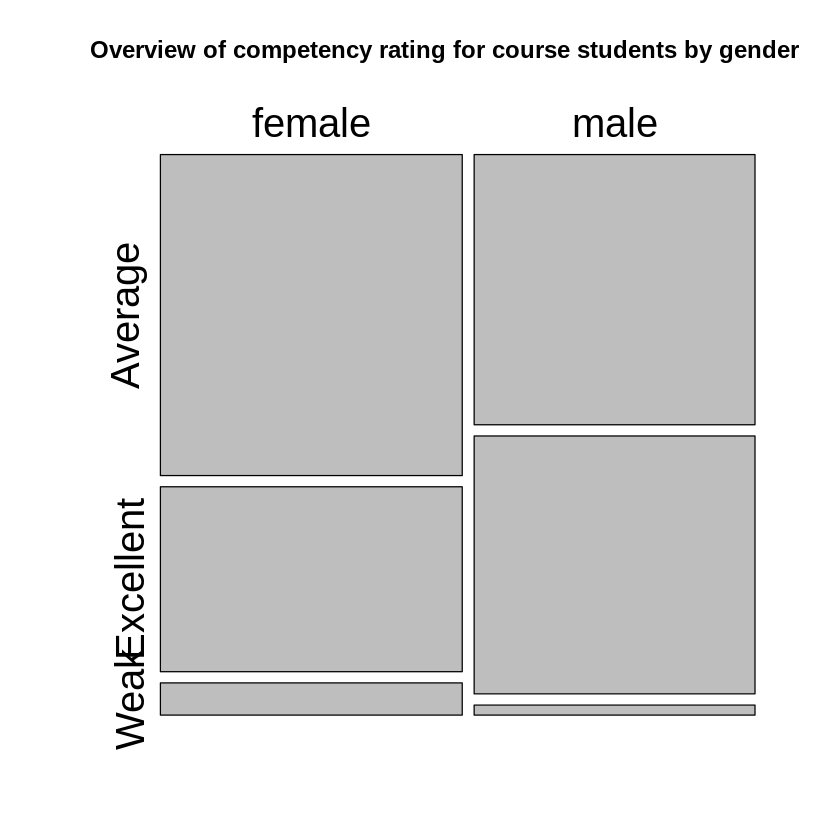

In [ ]:
#4 Create table plot with Mosaicplot with nice title
mosaicplot(table(data$gender, data$classification), main = "Overview of competency rating for course students by gender", cex = 2)